Номер студента: 18, N = 2
n от 1000 до 20000 с шагом 1000
Всего точек: 20
Идут вычисления...


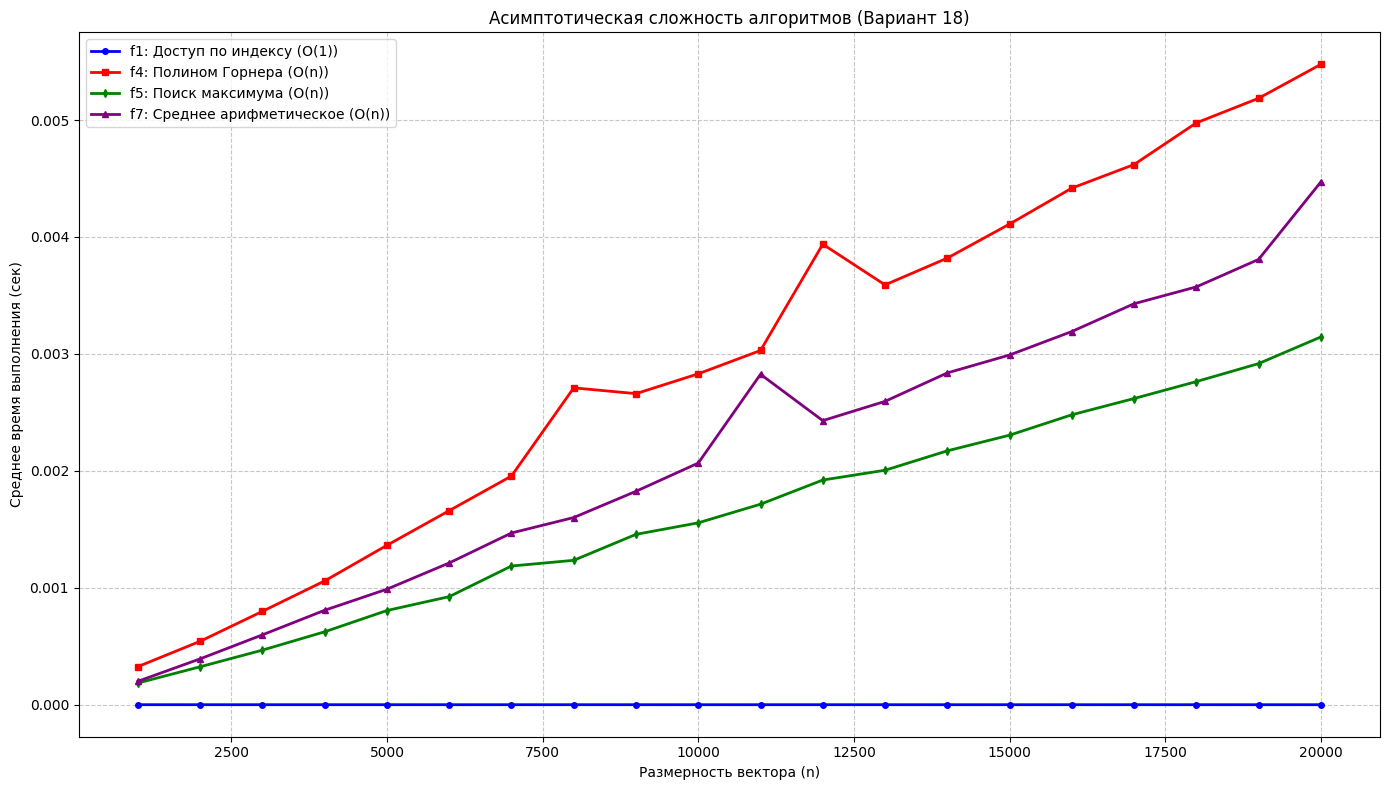

In [12]:
import time
import numpy as np
import matplotlib.pyplot as plt


student_number = 18  
N = 20 - student_number
n_start = 1000
n_end = 10**5 * N
step = 100 * N
num_runs = 5

print(f"Номер студента: {student_number}, N = {N}")
print(f"n от {n_start} до {n_end} с шагом {step}")

n_values = list(range(n_start, n_end + 1, step))
print(f"Всего точек: {len(n_values)}")

times_f1, times_f4, times_f5, times_f7 = [], [], [], []

print("Идут вычисления...")
for n in n_values:
    v = np.random.rand(n) * 0.1 + 0.001
    
    # f1: Доступ к элементу по индексу 
    start_time = time.perf_counter()
    for _ in range(num_runs * 10000):  
        result = v[n // 2]
    times_f1.append((time.perf_counter() - start_time) / (num_runs * 10000))
    
    # f4: Вычисление полинома методом Горнера 
    x_val = 1.0001
    start_time = time.perf_counter()
    for _ in range(num_runs):
        if n > 0:
            result = v[0]
            for k in range(1, n):
                result = result * x_val + v[k]
    times_f4.append((time.perf_counter() - start_time) / num_runs)
    
    # f5: Поиск максимума простым перебором 
    start_time = time.perf_counter()
    for _ in range(num_runs * 100): 
        result = v[0]
        for k in range(1, n):
            if v[k] > result:
                result = v[k]
    times_f5.append((time.perf_counter() - start_time) / (num_runs * 100))
    
    # f7: Среднее арифметическое 
    start_time = time.perf_counter()
    for _ in range(num_runs):
        total = 0
        for k in range(n):
            total += v[k]
        result = total / n if n > 0 else 0
    times_f7.append((time.perf_counter() - start_time) / num_runs)

plt.figure(figsize=(14, 8))

plt.plot(n_values, times_f1, 'o-', label='f1: Доступ по индексу (O(1))', markersize=4, linewidth=2, color='blue')
plt.plot(n_values, times_f4, 's-', label='f4: Полином Горнера (O(n))', markersize=4, linewidth=2, color='red')
plt.plot(n_values, times_f5, 'd-', label='f5: Поиск максимума (O(n))', markersize=4, linewidth=2, color='green')
plt.plot(n_values, times_f7, '^-', label='f7: Среднее арифметическое (O(n))', markersize=4, linewidth=2, color='purple')

plt.xlabel('Размерность вектора (n)')
plt.ylabel('Среднее время выполнения (сек)')
plt.title(f'Асимптотическая сложность алгоритмов (Вариант {student_number})')
plt.legend()
plt.grid(True, ls='--', alpha=0.7)
plt.tight_layout()
plt.show()